In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating DataFrame
data=dict({'Hours':(2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4 ,2.7 ,4.8 ,3.8 ,6.9 ,7.8),
           'Scores':(21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86)})

data1=pd.DataFrame.from_dict(data)

In [3]:
data1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Creating X and Y
X=data1['Hours']
Y=data1['Scores']

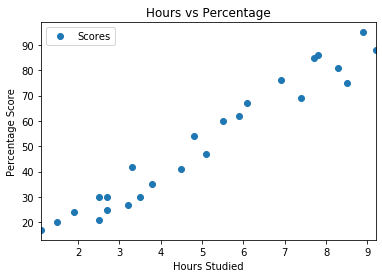

In [5]:
data1.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### There is a positive correlation visible.

In [6]:
# Spliting data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=25)

In [7]:
X_train

16    2.5
11    5.9
20    2.7
14    1.1
23    6.9
19    7.4
3     8.5
7     5.5
1     5.1
5     1.5
24    7.8
8     8.3
18    6.1
12    4.5
22    3.8
15    8.9
4     3.5
Name: Hours, dtype: float64

In [8]:
#Importing statsmodel.api library
import statsmodels.api as sm

In [9]:
#Adding a costant to get an intercept
X_train_sm=sm.add_constant(X_train)

C:\Users\Akshay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
#Fitting the regression line using OLS
lr=sm.OLS(Y_train,X_train_sm).fit()

In [11]:
#printing the parameters
lr.params

const    3.179830
Hours    9.632699
dtype: float64

In [12]:
lr.summary()

C:\Users\Akshay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     294.3
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           2.88e-11
Time:                        08:49:48   Log-Likelihood:                -52.332
No. Observations:                  17   AIC:                             108.7
Df Residuals:                      15   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1798      3.268      0.973      0.346      -3.785      10.145
Hours          9.6327      0.562     17.155      0.000       8.436      10.830
==============================================================================
Omnibus:                        2.680   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                1.296
Skew:                          -0.303   Prob(JB):                        0.523
Kurtosis:                       1.790   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The coefficient for Hours is 9.632 and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.

##### R-squared value is 0.952, which means that 95.2% of scores variance can be explained by hours column using this line.

##### Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

<function matplotlib.pyplot.show(*args, **kw)>

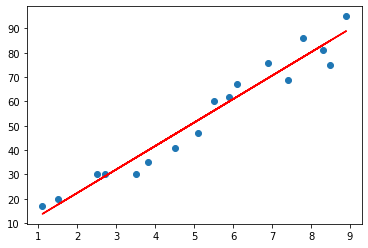

In [13]:
#From the parameters, we got the values of the intercept and the slope for the straight line.The equation of the line is
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, 3.179 + 9.632*X_train, 'r')
plt.show

In [14]:
#Residual analysis
# error= actualy value- y predicted value

#Predicting y value using training data of X
y_train_pred=lr.predict(X_train_sm)

In [15]:
#Creating residuals from the Y_train data and predicted y_data
res=(Y_train-y_train_pred)

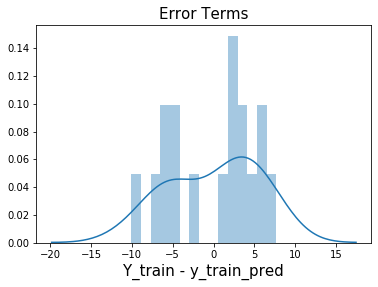

In [16]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - y_train_pred', fontsize = 15)
plt.show()

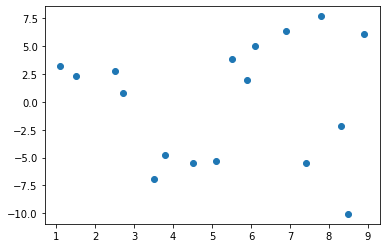

In [17]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [18]:
#Predictions on the Test data or Evaluating the model
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

2     34.004466
9     29.188117
17    21.481958
10    77.351611
21    49.416784
13    34.967736
0     27.261577
6     91.800659
dtype: float64

In [19]:
# importing the r2_score library from sklearn.metrics package.
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, y_test_pred)
r_squared

0.9515586724822473

#### Result: If a student studies for 9.25hrs/day, it will get a score around 95.15%.

#### Note: Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

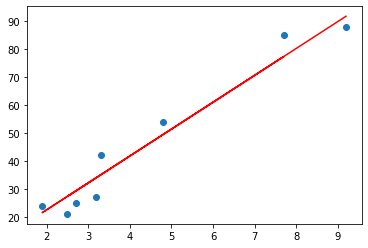

In [20]:
# Visualize the line on the test set
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()